<a href="https://colab.research.google.com/github/ArchanaSahoo89/EDA_ASSIGNMENT/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Title: Bike Details Dataset

=name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")

selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)

year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)

seller_type: Seller category, either "Individual" or "Dealer" (Categorical)

owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)

km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)

ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/EDA_Assignment_Dataset/BIKE DETAILS.csv'
bike_data = pd.read_csv(file_path)

bike_data.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
# Question 1: What is the range of selling prices in the dataset?
selling_price_range = (bike_data['selling_price'].min(), bike_data['selling_price'].max())

# Question 2: What is the median selling price for bikes in the dataset?
selling_price_median = bike_data['selling_price'].median()

# Question 3: What is the most common seller type?
most_common_seller_type = bike_data['seller_type'].mode()[0]

# Question 4: How many bikes have driven more than 50,000 kilometers?
bikes_above_50k_km = bike_data[bike_data['km_driven'] > 50000].shape[0]

# Question 5: What is the average km_driven value for each ownership type?
average_km_driven_per_owner = bike_data.groupby('owner')['km_driven'].mean()

selling_price_range, selling_price_median, most_common_seller_type, bikes_above_50k_km, average_km_driven_per_owner


((5000, 760000),
 45000.0,
 'Individual',
 170,
 owner
 1st owner     32816.583333
 2nd owner     39288.991870
 3rd owner     33292.181818
 4th owner    311500.000000
 Name: km_driven, dtype: float64)

In [ ]:
# 1. Range of selling prices: ₹5,000 to ₹7,60,000.
# 2. Median selling price: ₹45,000.
# 3. Most common seller type: "Individual".
# 4. Number of bikes that have driven more than 50,000 kilometers: 170.
# 5. Average km_driven value for each ownership type:
      # 1st owner: 32,817 km
      # 2nd owner: 39,289 km
      # 3rd owner: 33,292 km
      # 4th owner: 311,500 km (likely an outlier)

In [ ]:
# Question 6: What proportion of bikes are from the year 2015 or older?
bikes_2015_or_older = bike_data[bike_data['year'] <= 2015].shape[0]
proportion_2015_or_older = bikes_2015_or_older / bike_data.shape[0]

# Question 7: What is the trend of missing values across the dataset?
missing_values_trend = bike_data.isnull().sum()

# Question 8: What is the highest ex_showroom_price recorded, and for which bike?
highest_ex_showroom_price = bike_data['ex_showroom_price'].max()
bike_with_highest_ex_showroom = bike_data[bike_data['ex_showroom_price'] == highest_ex_showroom_price]['name'].values

bikes_2015_or_older, proportion_2015_or_older, missing_values_trend, highest_ex_showroom_price, bike_with_highest_ex_showroom


(601,
 0.5664467483506126,
 name                   0
 selling_price          0
 year                   0
 seller_type            0
 owner                  0
 km_driven              0
 ex_showroom_price    435
 dtype: int64,
 1278000.0,
 array(['Harley-Davidson Street Bob'], dtype=object))

In [ ]:
# 6. Proportion of bikes from the year 2015 or older: 56.64% (601 out of 1061 bikes).
# 7. Trend of missing values across the dataset:
#      ex_showroom_price: 435 missing values.
#      All other columns have no missing values.
# 8. Highest ex_showroom_price recorded: ₹12,78,000 for the bike "Harley-Davidson Street Bob".

In [ ]:
# Question 9: What is the total number of bikes listed by each seller type?
bikes_per_seller_type = bike_data['seller_type'].value_counts()

# Question 10: What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = bike_data[bike_data['owner'] == '1st owner'][['selling_price', 'km_driven']].corr()

# Question 11: Identify and remove outliers in the km_driven column using the IQR method.
Q1 = bike_data['km_driven'].quantile(0.25)
Q3 = bike_data['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_removed = bike_data[(bike_data['km_driven'] >= lower_bound) & (bike_data['km_driven'] <= upper_bound)]

# Summary of removed outliers
removed_outliers_count = bike_data.shape[0] - outliers_removed.shape[0]

bikes_per_seller_type, first_owner_bikes, removed_outliers_count


(seller_type
 Individual    1055
 Dealer           6
 Name: count, dtype: int64,
                selling_price  km_driven
 selling_price       1.000000  -0.243482
 km_driven          -0.243482   1.000000,
 39)

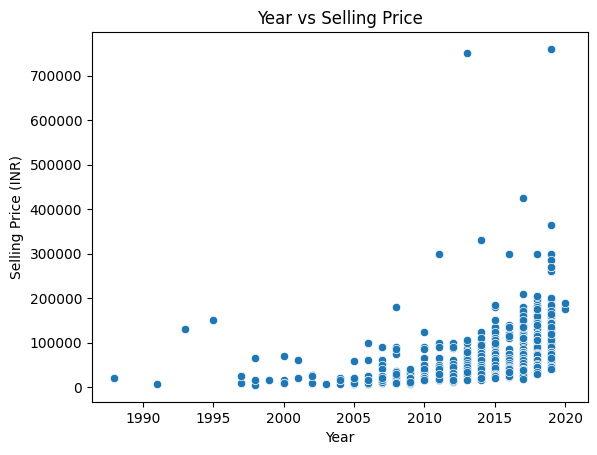

In [ ]:
# Question 12: Perform a bivariate analysis to visualize the relationship between year and selling_price?

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship
sns.scatterplot(x=bike_data['year'], y=bike_data['selling_price'])
plt.title('Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (INR)')
plt.show()

In [ ]:
# Question 13: What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year = 2024
bike_data['age'] = current_year - bike_data['year']
depreciation = bike_data.groupby('age')['selling_price'].mean()
print(depreciation)

age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


In [ ]:
# Question 14: Which bike names are priced significantly above the average price for their manufacturing year?

year_avg_price = bike_data.groupby('year')['selling_price'].mean()
bike_data['avg_price_year'] = bike_data['year'].map(year_avg_price)
significant_bikes = bike_data[bike_data['selling_price'] > 1.5 * bike_data['avg_price_year']]
print(significant_bikes[['name', 'year', 'selling_price', 'avg_price_year']])

                                     name  year  selling_price  avg_price_year
2     Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000    34289.285714
13                          Yamaha YZF R3  2019         365000   119689.511628
18    Royal Enfield Classic Gunmetal Grey  2018         150000    87660.374046
23                          Jawa Standard  2019         180000   119689.511628
..                                    ...   ...            ...             ...
979             Royal Enfield Thunder 500  2015         105000    56500.000000
981             Royal Enfield Thunder 350  2013         105000    51136.986301
983             Royal Enfield Classic 350  2015         100000    56500.000000
984             Royal Enfield Classic 500  2014          95000    48668.131868
985             Royal Enfield Classic 500  2011          90000    35655.721311

[157 rows x 4 columns]


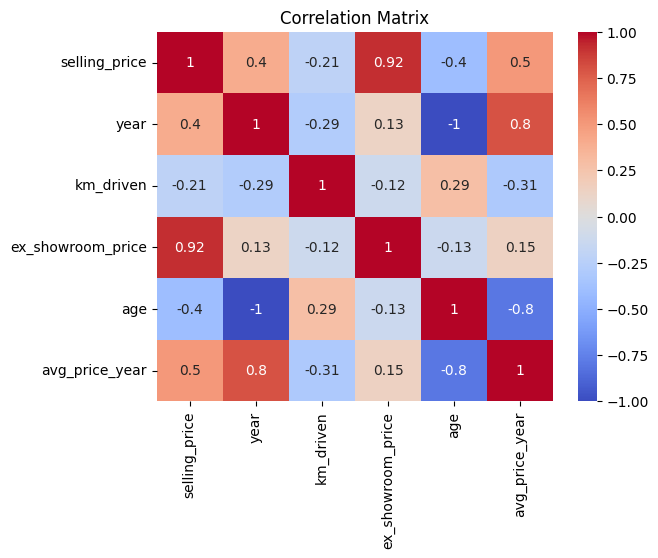

In [ ]:
# Question 15:  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Correlation matrix
numeric_cols = bike_data.select_dtypes(include=['float64', 'int64']).corr()

# Heatmap visualization
sns.heatmap(numeric_cols, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


      Title: Car Sale Dataset

Car_id: A unique identifier for each car in the dataset, helping to track individual car entries

Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD

Customer Name: The name of the customer who purchased the car, represented as a string

Gender: The gender of the customer, categorized as "Male" or "Female.

Annual Income: The customer's annual income in US dollars, represented as a numeric value

Dealer_Name: The name of the dealership selling the car, represented as a string

Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc

Model: The specific model name of the car, such as "Corolla," "Civic," etc

Engine: The engine type of the car, such as "V6," "I4," etc

Transmission: The type of transmission in the car, either "Manual" or "Automatic.

Color: The color of the car, represented as a string (e.g., "Red," "Blue")

Price ($): The selling price of the car in US dollars

Dealer_No: A unique identifier for each car dealer in the dataset

Body Style: The body style of the car, such as "Sedan," "SUV," etc

Phone: The phone number of the customer who purchased the car

Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/EDA_Assignment_Dataset/Car Sale.csv')  # Replace with your actual dataset path

# Display first few rows
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,01-02-2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01-02-2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01-02-2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01-02-2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01-02-2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


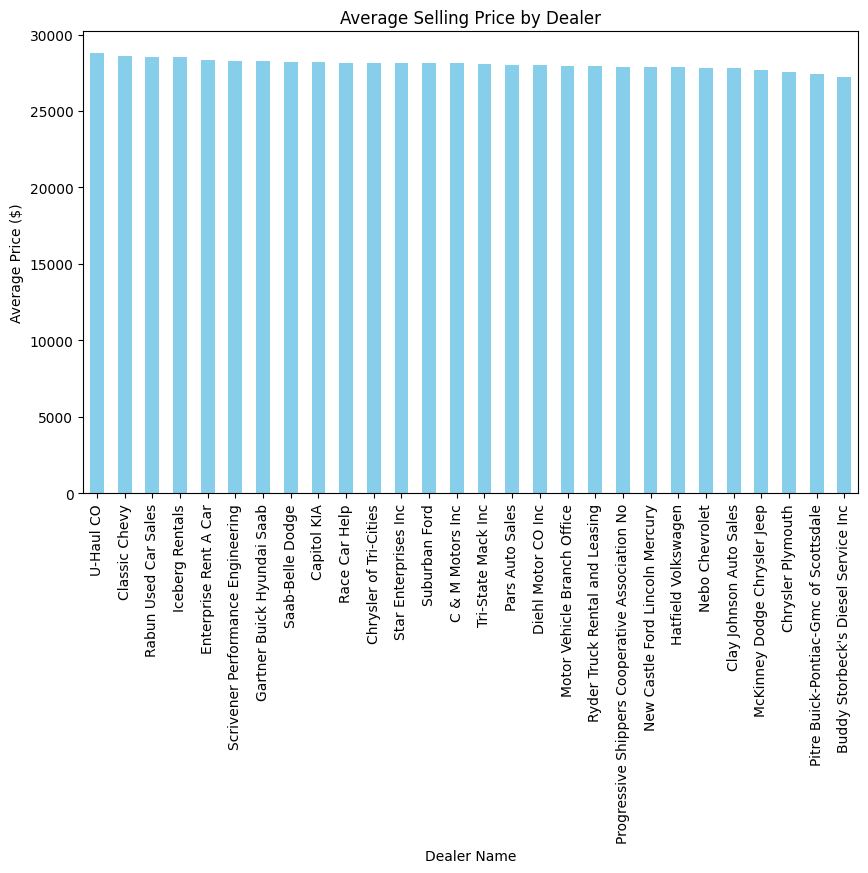

In [ ]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Dealer and calculate the average price
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# Plotting the average price for each dealer
plt.figure(figsize=(10, 6))
dealer_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

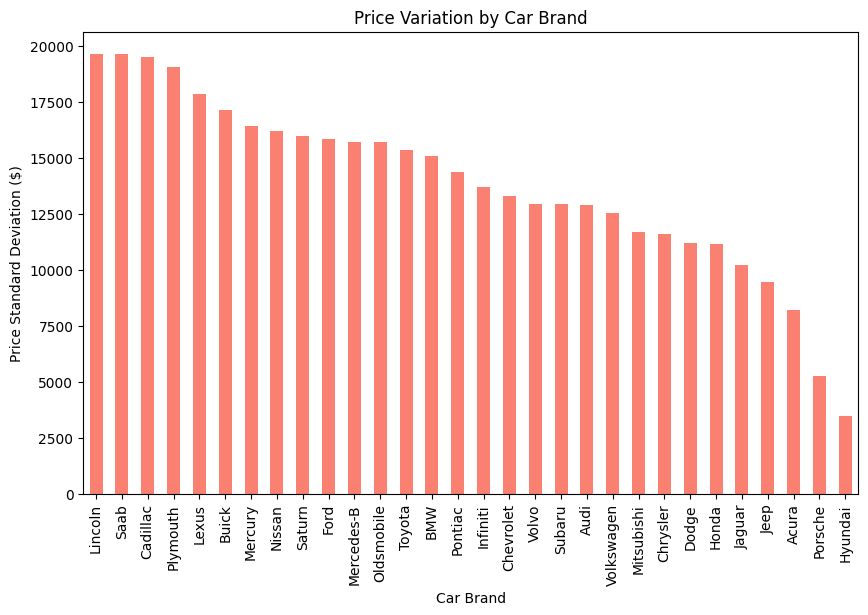

In [ ]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the standard deviation of prices for each car brand
company_price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Plotting the price variation by brand
plt.figure(figsize=(10, 6))
company_price_variation.plot(kind='bar', color='salmon')
plt.title('Price Variation by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price Standard Deviation ($)')
plt.xticks(rotation=90)
plt.show()

<ipython-input-20-795b8b55c4ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')


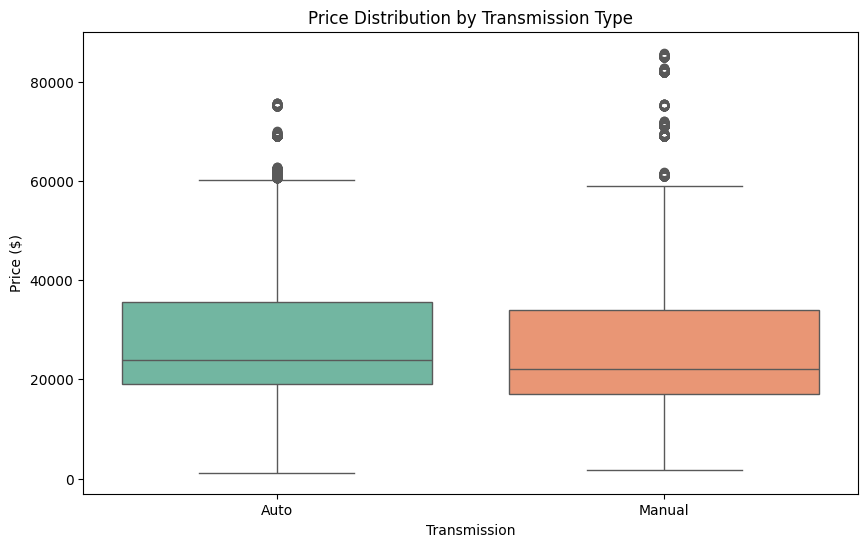

In [ ]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the price distribution by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='Set2')
plt.title('Price Distribution by Transmission Type')
plt.show()

<ipython-input-21-e4963eabf285>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set3')


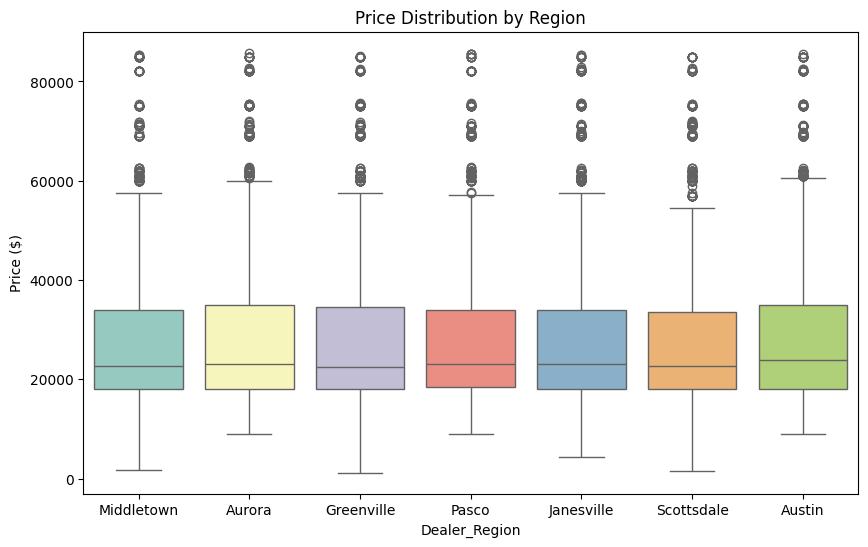

In [ ]:
# 4. What is the distribution of car prices across different regions?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the price distribution by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set3')
plt.title('Price Distribution by Region')
plt.show()

<ipython-input-14-a7860ef4b1f7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Body Style', data=df, palette='Set1')


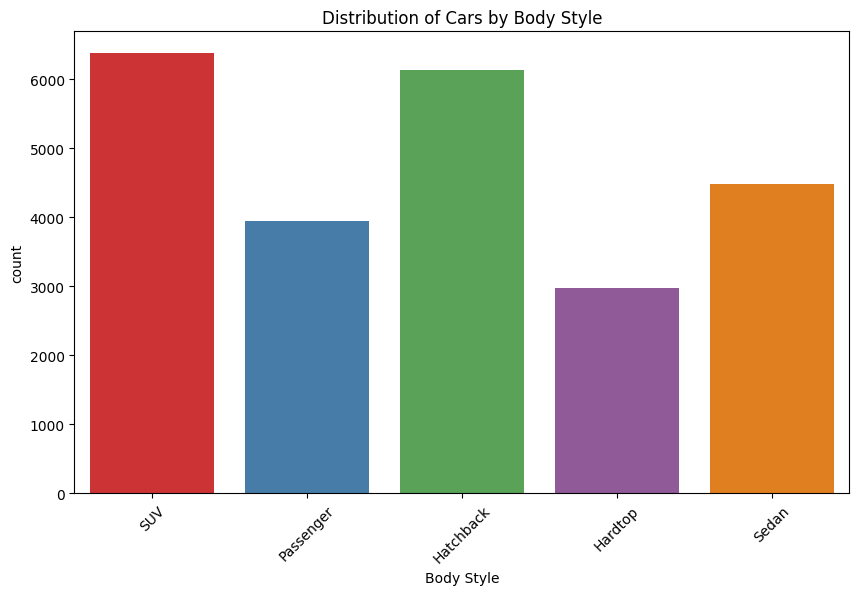

<ipython-input-14-a7860ef4b1f7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Body Style', y='Price ($)', data=df, palette='Set1')


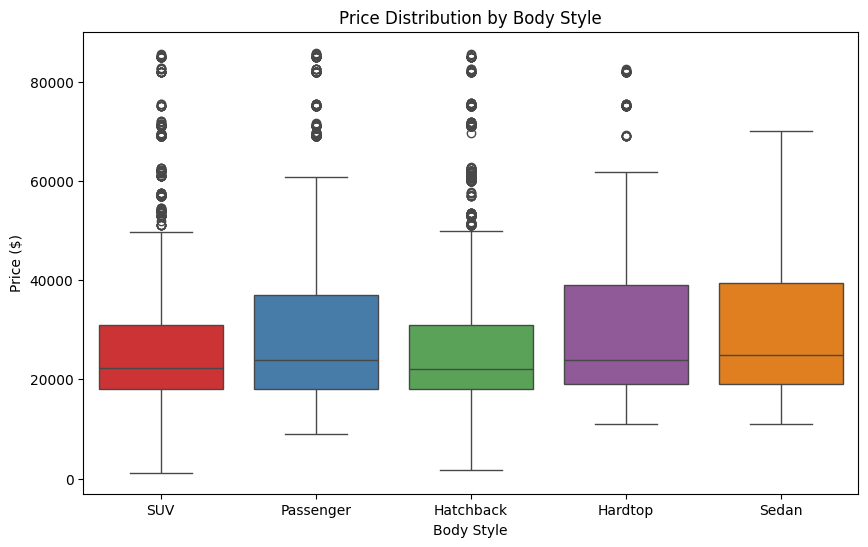

In [ ]:
# 5.  What is the distribution of cars based on body styles?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of cars sold for each body style
plt.figure(figsize=(10, 6))
sns.countplot(x='Body Style', data=df, palette='Set1')
plt.title('Distribution of Cars by Body Style')
plt.xticks(rotation=45)
plt.show()

# Boxplot for price distribution by body style
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price ($)', data=df, palette='Set1')
plt.title('Price Distribution by Body Style')
plt.show()

<ipython-input-19-207fa93a44d4>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_income_avg_price = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

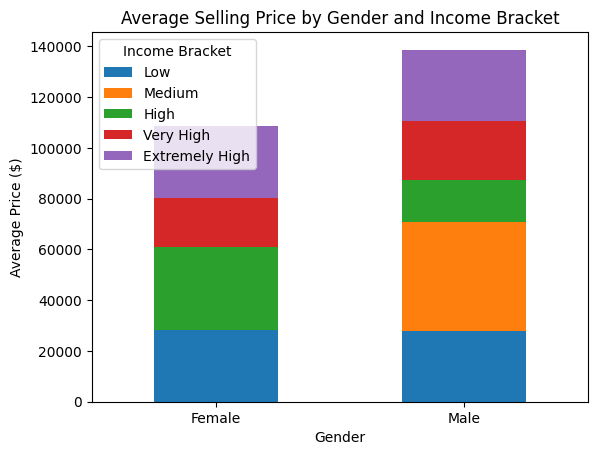

In [ ]:
# 6. How does the average selling price of cars vary by customer gender and annual income?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create income brackets
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=[0, 50000, 100000, 150000, 200000, np.inf], labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# Calculate average price by gender and income bracket
gender_income_avg_price = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().unstack()

# Plotting the results
plt.figure(figsize=(10, 6))
gender_income_avg_price.plot(kind='bar', stacked=True)
plt.title('Average Selling Price by Gender and Income Bracket')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.show()


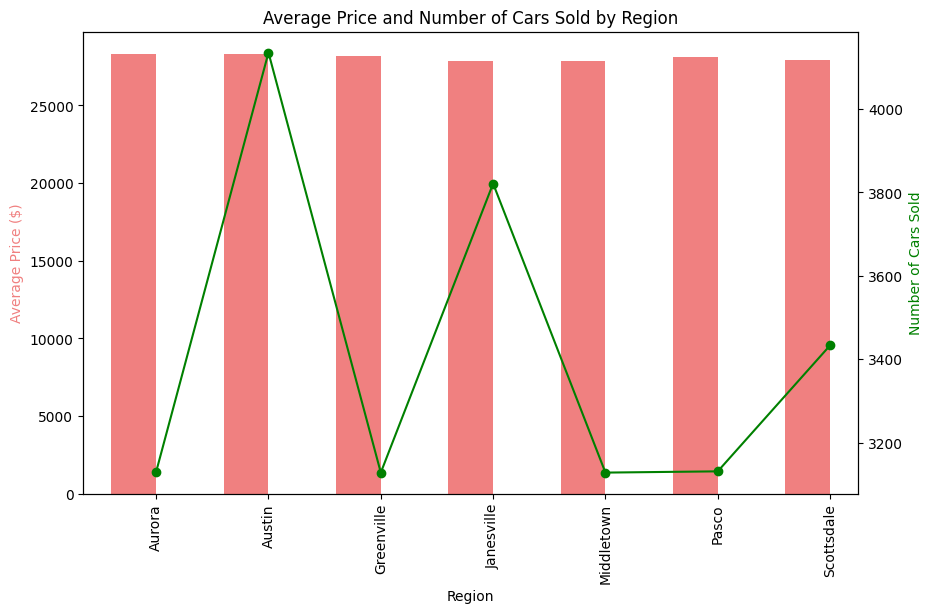

In [ ]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

# Group by region and calculate the average price and number of cars sold
region_sales = df.groupby('Dealer_Region').agg({'Price ($)': 'mean', 'Car_id': 'count'})

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average price
region_sales['Price ($)'].plot(kind='bar', color='lightcoral', ax=ax1, position=1, width=0.4, label='Avg Price')
ax1.set_ylabel('Average Price ($)', color='lightcoral')
ax1.set_xlabel('Region')

# Create a second y-axis for number of cars sold
ax2 = ax1.twinx()
region_sales['Car_id'].plot(kind='line', color='green', ax=ax2, marker='o', label='No. of Cars Sold')
ax2.set_ylabel('Number of Cars Sold', color='green')

plt.title('Average Price and Number of Cars Sold by Region')
plt.show()

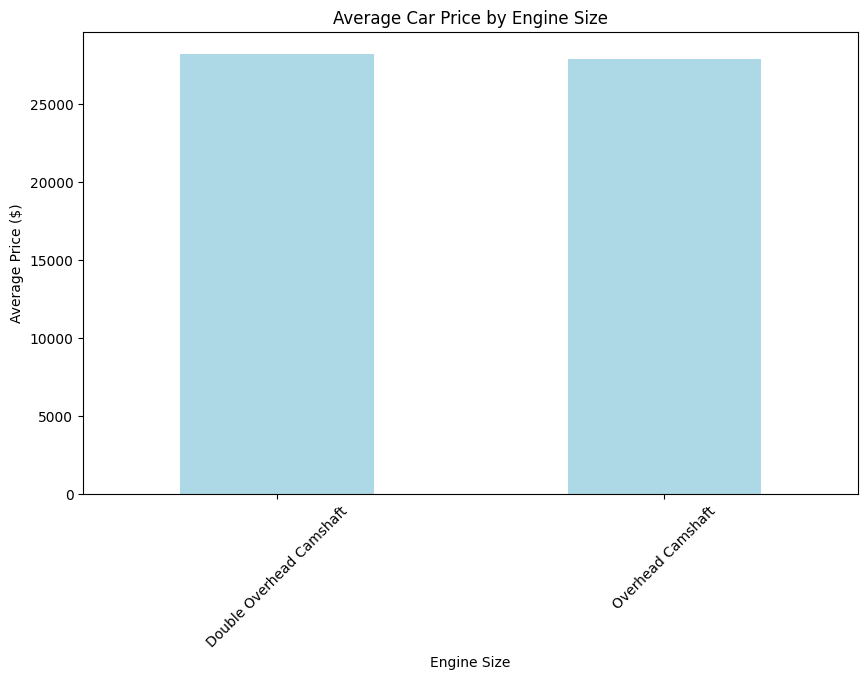

In [ ]:
# 8. How does the average car price differ between cars with different engine sizes?

# Group by engine and calculate the average price
engine_avg_price = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

# Plotting the average price by engine size
plt.figure(figsize=(10, 6))
engine_avg_price.plot(kind='bar', color='lightblue')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-c5a9d5696e15>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income Bracket', y='Price ($)', data=df, palette='muted')


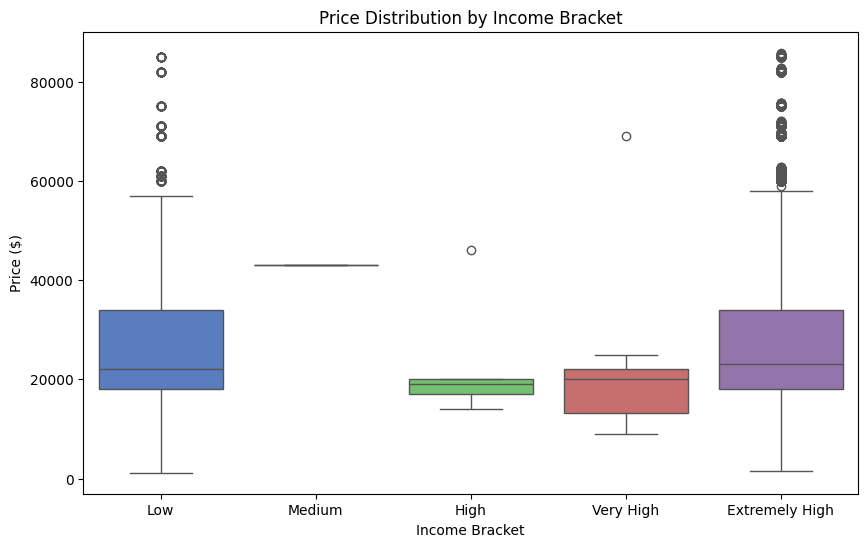

In [ ]:
# 9. How do car prices vary based on the customer’s annual income bracket?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the price distribution by income bracket
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Bracket', y='Price ($)', data=df, palette='muted')
plt.title('Price Distribution by Income Bracket')
plt.show()


<ipython-input-17-8e8c8fa4f7eb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price ($)', data=top_5_data, palette='Set2')


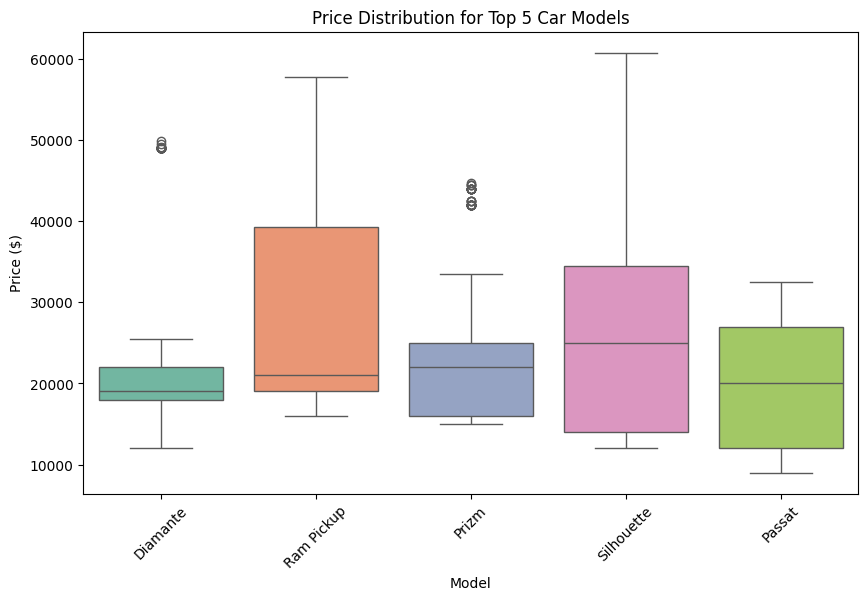

In [ ]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by car model and count number of cars sold
top_5_models = df['Model'].value_counts().head(5)

# Filter data for the top 5 models
top_5_data = df[df['Model'].isin(top_5_models.index)]

# Plot the price distribution for the top 5 models
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_data, palette='Set2')
plt.title('Price Distribution for Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()


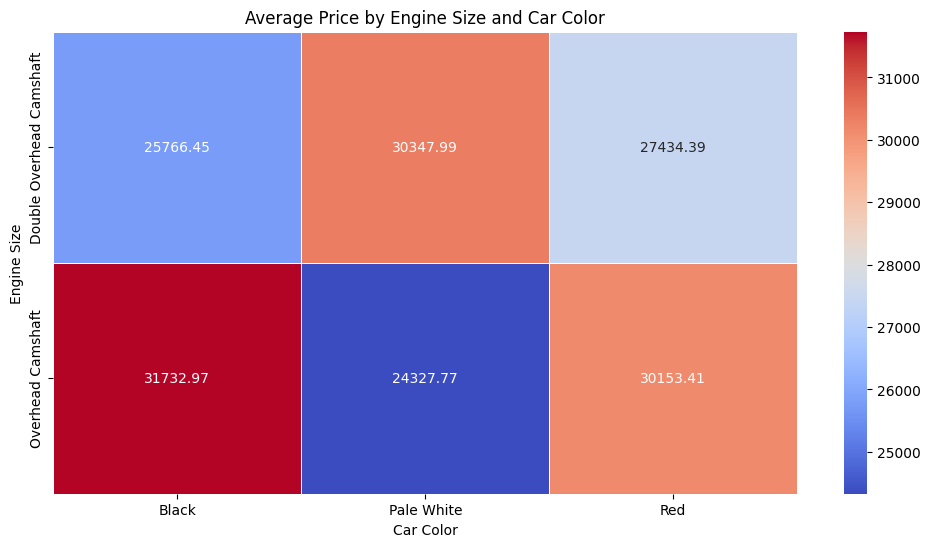

In [ ]:
# 11.  How does car price vary with engine size across different car colors, and which colors have the highest price variation?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by engine size and car color to analyze price variation
engine_color_price = df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()

# Plotting the results
plt.figure(figsize=(12, 6))
sns.heatmap(engine_color_price, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Average Price by Engine Size and Car Color')
plt.xlabel('Car Color')
plt.ylabel('Engine Size')
plt.show()


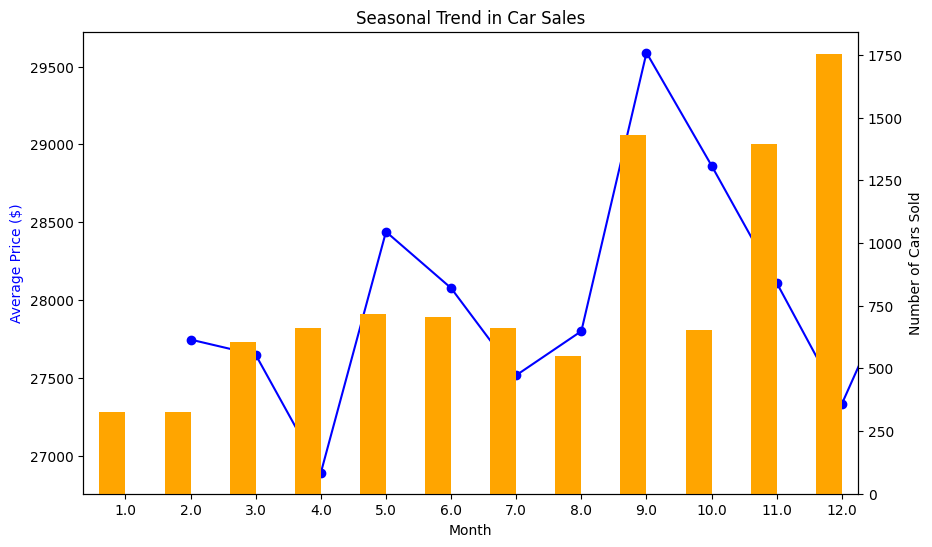

In [ ]:
# 12. Is there any seasonal trend in car sales based on the date of sale?

import pandas as pd # Importing the pandas library
import matplotlib.pyplot as plt

df = pd.read_csv('/Car Sale.csv')  # Reading the CSV file into a DataFrame

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month from date
df['Month'] = df['Date'].dt.month

# Group by month and calculate total sales and average price
monthly_sales = df.groupby('Month').agg({'Price ($)': 'mean', 'Car_id': 'count'})

# Plotting the seasonal trends
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot average price
monthly_sales['Price ($)'].plot(kind='line', color='blue', ax=ax1, marker='o', label='Avg Price')
ax1.set_ylabel('Average Price ($)', color='blue')

# Create second y-axis for number of cars sold
ax2 = ax1.twinx()
monthly_sales['Car_id'].plot(kind='bar', color='orange', ax=ax2, width=0.4, position=1, label='No. of Cars Sold')
ax2.set_ylabel('Number of Cars Sold')

plt.title('Seasonal Trend in Car Sales')
plt.show()


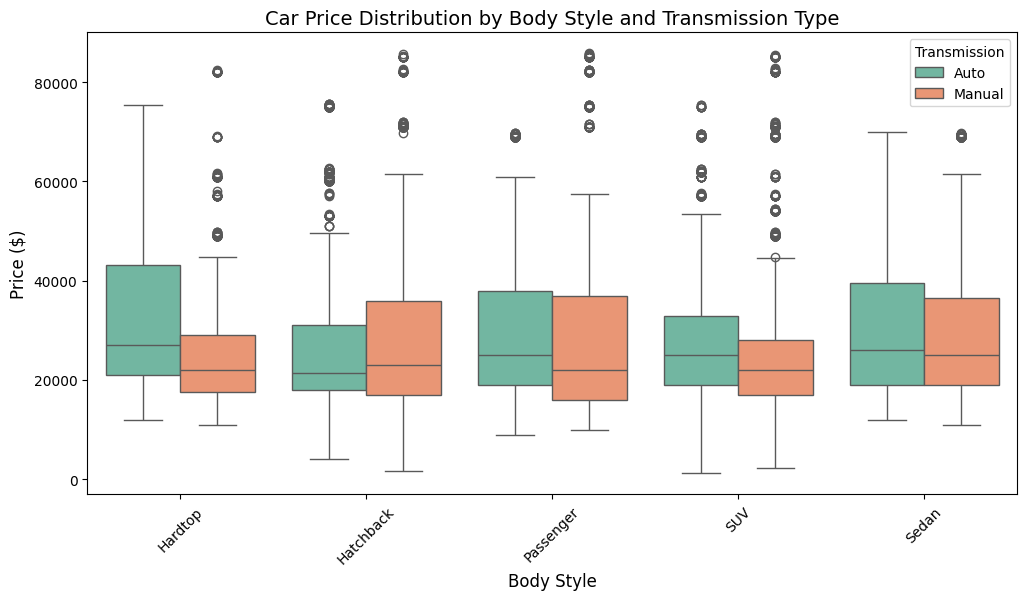

In [ ]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame that contains the car sales data
# Example dataset structure:
# df['Body Style'], df['Transmission'], df['Price ($)']

# Ensure the 'Body Style' and 'Transmission' columns are treated as categorical variables
df['Body Style'] = df['Body Style'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')

# Plotting the car price distribution by combinations of Body Style and Transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set2')

# Adding titles and labels
plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=14)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


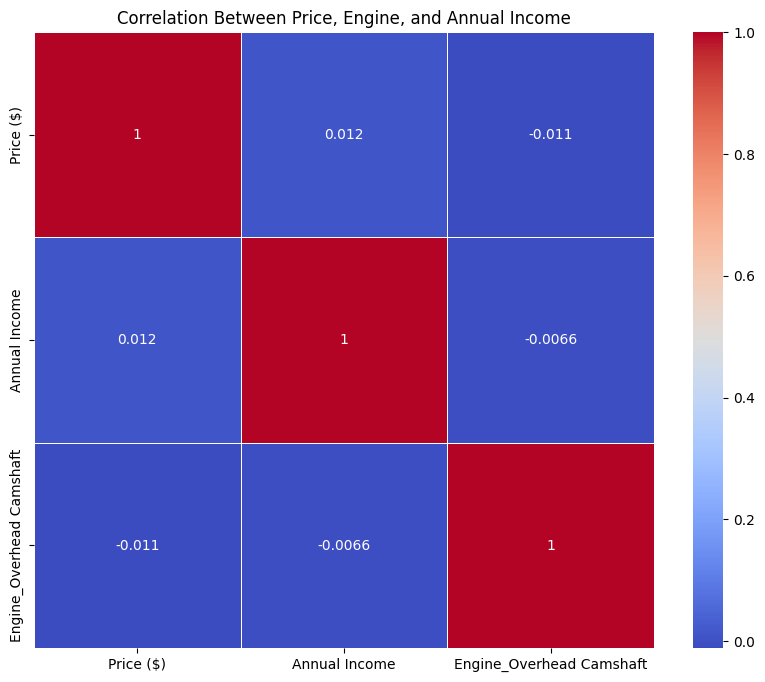

In [ ]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# Assuming 'Engine' represents engine size (categorical)
# We'll use one-hot encoding to represent it numerically

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# One-hot encode 'Engine'
engine_encoded = pd.get_dummies(df['Engine'], prefix='Engine', drop_first=True)
df_encoded = pd.concat([df, engine_encoded], axis=1)

# Select relevant columns for correlation
corr_cols = ['Price ($)', 'Annual Income'] + list(engine_encoded.columns)
corr_matrix = df_encoded[corr_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))  # Increased figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Price, Engine, and Annual Income')
plt.show()

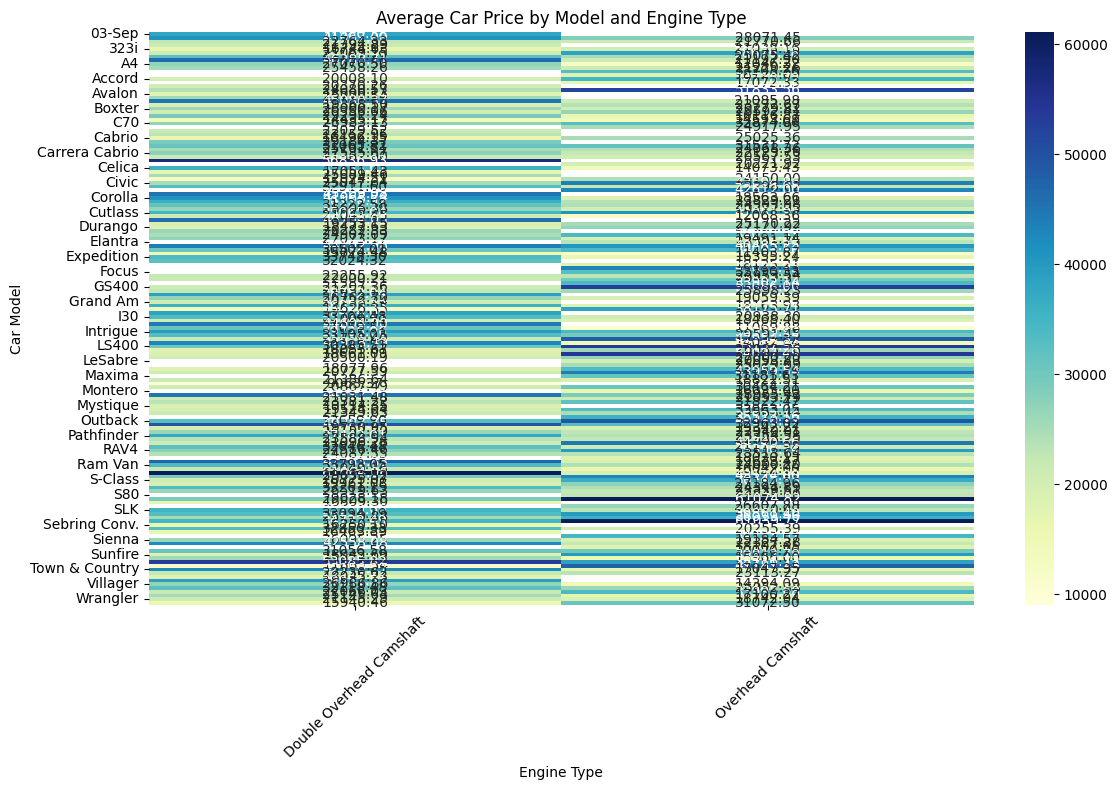

In [ ]:
# 15.  How does the average car price vary across different car models and engine types?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Car Sale.csv'  # Update this path if needed
car_data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format (if not already done)
car_data['Date'] = pd.to_datetime(car_data['Date'], errors='coerce')

# Group by 'Model' and 'Engine' to calculate the average price
avg_price = car_data.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

# Pivot the data for better visualization
price_pivot = avg_price.pivot(index='Model', columns='Engine', values='Price ($)')

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(price_pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Average Car Price by Model and Engine Type')
plt.ylabel('Car Model')
plt.xlabel('Engine Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


          
    Title:  Amazon Sales Data

  Features:

 product_id: Unique identifier for each product

 product_name: Name of the product

 category: Category of the product

 discounted_price: Discounted price of the product

 actual_price: Actual price of the product

 discount_percentage: Percentage of discount for the product

 rating: Rating of the product (1-5)

 rating_count: Number of people who voted for the Amazon rating

 about_product: Description about the product

 user_id: ID of the user who wrote the review

 user_name: Name of the user who wrote the review

 review_id: ID of the user review

 review_title: Short review

 review_content: Long review

 img_link: Image link of the product

 product_link: Official website link of the product


In [ ]:
# 1. What is the average rating for each product category?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/EDA_Assignment_Dataset/amazon.csv'  # Update the file path if needed
amazon_data = pd.read_csv(file_path)

avg_rating_by_category = pd.to_numeric(amazon_data['rating'], errors='coerce')
print("Average rating by category:")
print(avg_rating_by_category)

Average rating by category:
0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1465, dtype: float64


In [ ]:
# 2. What are the top rating_count products by category?

top_rating_count_by_category = amazon_data.sort_values(by=['category', 'rating_count'], ascending=[True, False]).groupby('category').head(1)
print("\nTop rating_count products by category:")
print(top_rating_count_by_category[['category', 'product_name', 'rating_count']])


Top rating_count products by category:
                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With 

Text(0.5, 0, 'Discounted Price')

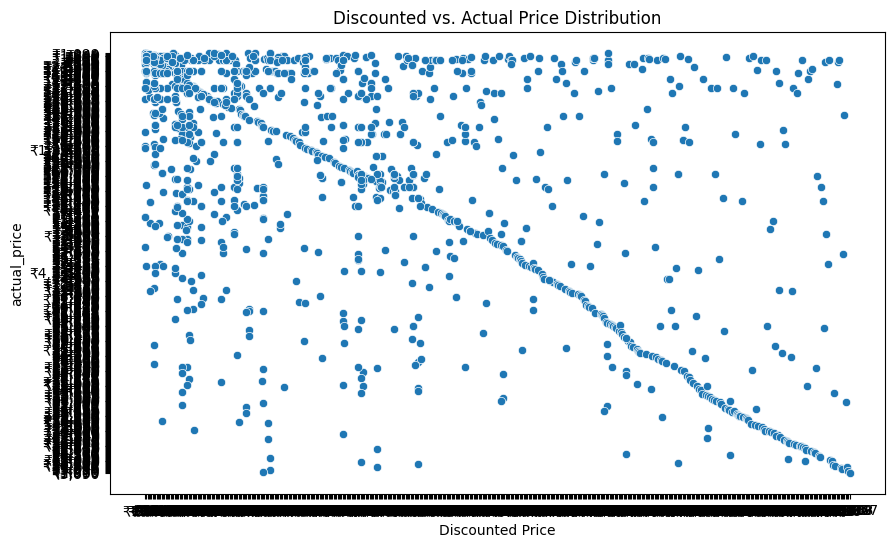

In [ ]:
# 3. What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='discounted_price', y='actual_price', data=amazon_data)
plt.title('Discounted vs. Actual Price Distribution')
plt.xlabel('Discounted Price')

In [ ]:
# 4. How does the average discount percentage vary across categories?

amazon_data['discount_percentage'] = amazon_data['discount_percentage'].str.rstrip('%').astype(float)
avg_discount_by_category = amazon_data.groupby('category')['discount_percentage'].mean().reset_index()
print("\nAverage discount percentage by category:")
print(avg_discount_by_category)


Average discount percentage by category:
                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [ ]:
# 5. What are the most popular product names?

popular_products = amazon_data['product_name'].value_counts().head(10)
print("\nMost popular product names:")
print(popular_products)


Most popular product names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                

In [ ]:
# 6. What are the most popular product keywords?

top_product_names = amazon_data['product_name'].value_counts().head(10)
print("\nMost popular product names:")
print(top_product_names)


Most popular product names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                

In [ ]:
# 7. What are the most popular product reviews?

popular_keywords = amazon_data['about_product'].str.split(expand=True).stack().value_counts().head(10)
print("\nMost popular product keywords:")
print(popular_keywords)


Most popular product keywords:
and     5003
the     3553
to      3551
with    2805
for     2275
of      2013
your    1722
a       1702
|       1431
is      1425
Name: count, dtype: int64


In [ ]:
# 8. What is the correlation between discounted_price and rating?

# Remove currency symbols and commas from 'discounted_price'
amazon_data['discounted_price'] = amazon_data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

correlation_price_rating = amazon_data['discounted_price'].corr(pd.to_numeric(amazon_data['rating'], errors='coerce'))
print("\nCorrelation between discounted_price and rating:")
print(correlation_price_rating)


Correlation between discounted_price and rating:
0.12033741712288548


In [ ]:
# 9. What are the Top 5 categories based on the highest ratings?

# Convert the 'rating' column to numeric, handling errors by coercing to NaN
amazon_data['rating'] = pd.to_numeric(amazon_data['rating'], errors='coerce')

# Now calculate the average rating for each category
top_categories_by_rating = amazon_data.groupby('category')['rating'].mean().nlargest(5).reset_index()
print("\nTop 5 categories based on highest ratings:")
print(top_categories_by_rating)


Top 5 categories based on highest ratings:
                                            category  rating
0                      Computers&Accessories|Tablets     4.6
1            Computers&Accessories|Components|Memory     4.5
2  Computers&Accessories|NetworkingDevices|Networ...     4.5
3   Electronics|Cameras&Photography|Accessories|Film     4.5
4  Electronics|HomeAudio|MediaStreamingDevices|St...     4.5


In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.

print("\nPotential areas for improvement:")
low_rated_products = amazon_data[amazon_data['rating'] < 3]
print(f"Number of low-rated products: {len(low_rated_products)}")
print("Consider analyzing these products for improvement.")



Potential areas for improvement:
Number of low-rated products: 6
Consider analyzing these products for improvement.


    Title: Spotify Data

  Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

 Track Name: The title of the track, encapsulating its identity and essence.

 Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

 Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

 Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further exploration

In [ ]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/EDA_Assignment_Dataset/spotify.csv'  # Replace with your file path
spotify_df = pd.read_csv(file_path)

print("Null values in the dataset:\n", spotify_df.isnull().sum())
spotify_df.dropna(inplace=True)

Null values in the dataset:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64


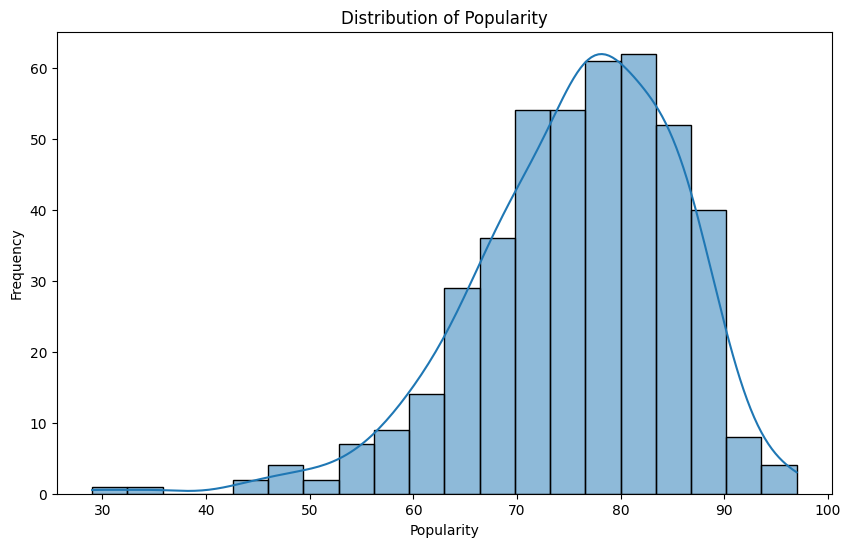

In [ ]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

plt.figure(figsize=(10, 6))
sns.histplot(spotify_df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

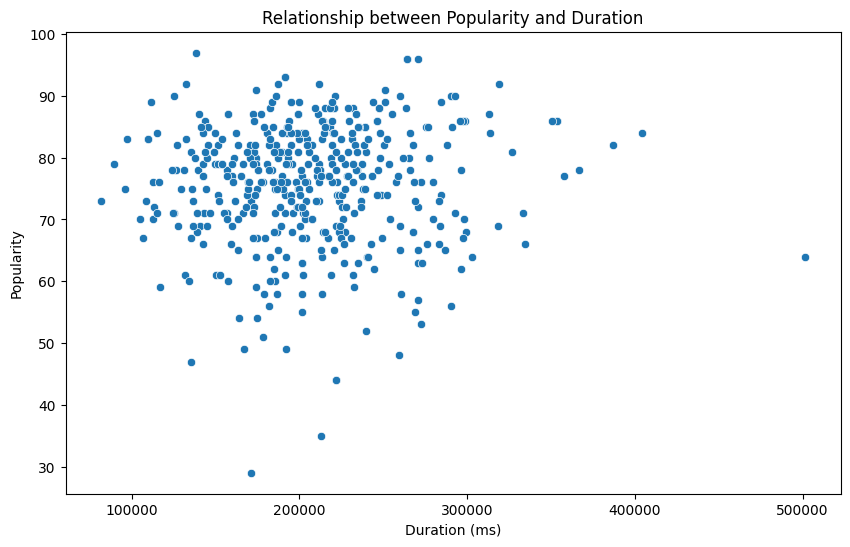

In [ ]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=spotify_df)
plt
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()



In [ ]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

artist_track_count = spotify_df['Artist'].value_counts()
print("Artist with the highest number of tracks:")
print(artist_track_count.head(1))



Artist with the highest number of tracks:
Artist
Drake    20
Name: count, dtype: int64


<ipython-input-27-e09082bfd38e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=spotify_df['Artist'], order=track_counts.index[:10], palette='viridis')


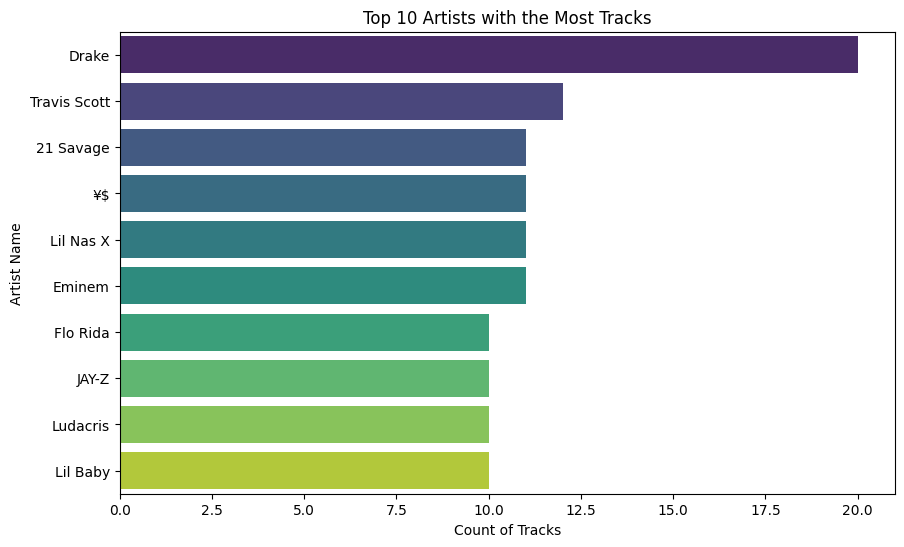

In [ ]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

plt.figure(figsize=(10, 6))
# Replace 'artist_name' with 'Artist' to get the value counts for artists
track_counts = spotify_df['Artist'].value_counts()
sns.countplot(y=spotify_df['Artist'], order=track_counts.index[:10], palette='viridis')
plt.title("Top 10 Artists with the Most Tracks")
plt.xlabel("Count of Tracks")
plt.ylabel("Artist Name")
plt.show()

In [ ]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

# Use 'Popularity' instead of 'popularity'
least_popular_tracks = spotify_df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:\n", least_popular_tracks)

# Replace 'artist_name' with 'Artist' and 'popularity' with 'Popularity' to match column names in DataFrame
top_artists = spotify_df.groupby('Artist')['Popularity'].mean().nlargest(5)
print("Top 5 Most Popular Artists by Average Popularity:\n", top_artists)

Top 5 Least Popular Tracks:
              Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
Top 5 Most Popular Artists by Average Popularity:
 Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64


In [ ]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

# Replace 'artist_name' with 'Artist' and 'popularity' with 'Popularity' to match column names in the DataFrame
popular_tracks = spotify_df[spotify_df['Artist'].isin(top_artists.index)]
most_popular_tracks = popular_tracks.loc[popular_tracks.groupby('Artist')['Popularity'].idxmax()]
print("Most Popular Tracks for Top 5 Artists:\n", most_popular_tracks[['Artist', 'Track Name', 'Popularity']])  # Print relevant columns

Most Popular Tracks for Top 5 Artists:
            Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


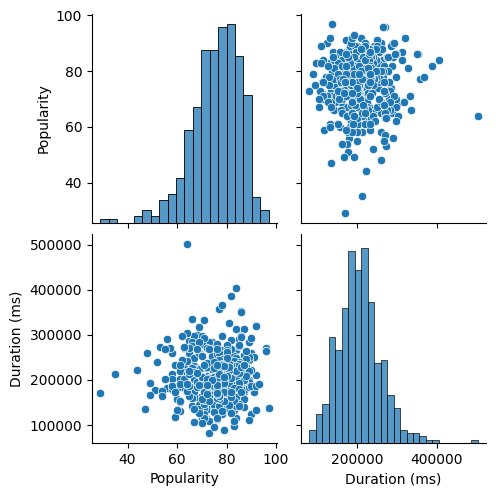

In [ ]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(spotify_df[['Popularity', 'Duration (ms)']])
plt.show()


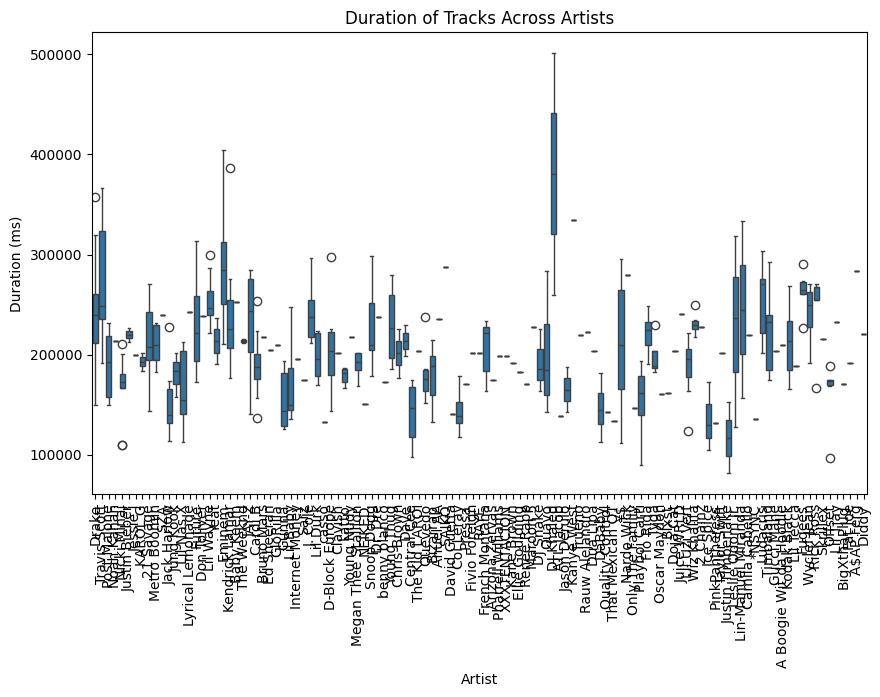

In [ ]:
# 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

plt.figure(figsize=(10, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=spotify_df)
plt.title('Duration of Tracks Across Artists')
plt.xlabel('Artist')
plt.ylabel
plt.xticks(rotation=90)
plt.show()

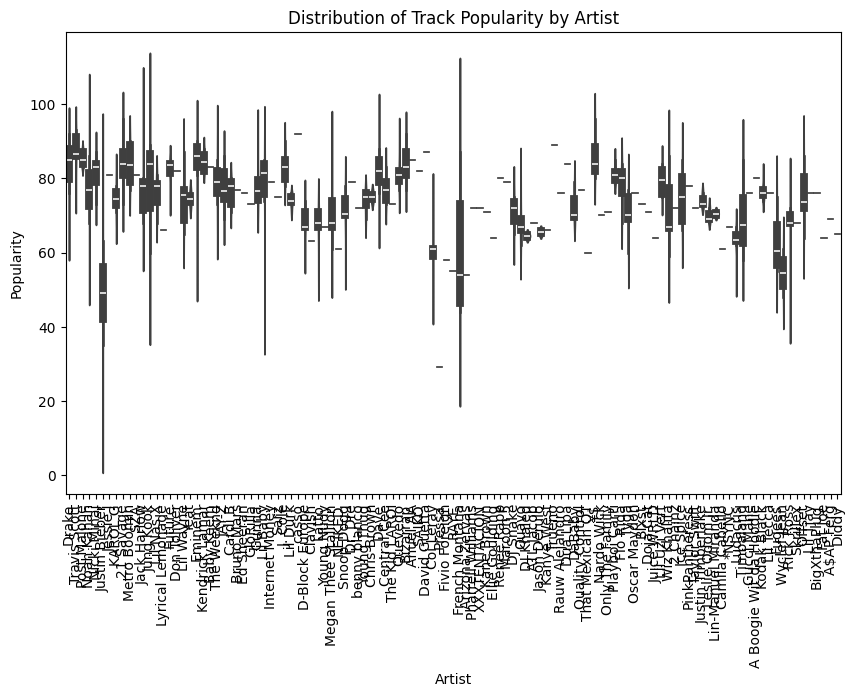

In [ ]:
# 10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(10, 6))
sns.violinplot(x='Artist', y='Popularity', data=spotify_df)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()